In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D  

In [7]:
df=pd.read_csv('mallCustomerData.csv') 
print(df.shape)
df.head(10)

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [17]:
print(df['Gender'].value_counts())
df =pd.get_dummies(df, columns=['Gender'])
print(df)

Female    112
Male       88
Name: Gender, dtype: int64
     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1   19                  15                      39   
1             2   21                  15                      81   
2             3   20                  16                       6   
3             4   23                  16                      77   
4             5   31                  17                      40   
..          ...  ...                 ...                     ...   
195         196   35                 120                      79   
196         197   45                 126                      28   
197         198   32                 126                      74   
198         199   32                 137                      18   
199         200   30                 137                      83   

     Gender_Female  Gender_Male  
0                0            1  
1                0            1  
2                1        

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


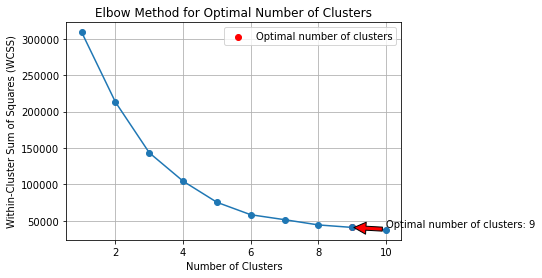

In [48]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the relevant columns

# Extracting the features for clustering
x = df[['Gender_Female','Gender_Male','Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

wcss_list = []  # Initializing the list for the values of WCSS

# 10 iterations for different number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)

# Plotting the within-cluster sum of squares (WCSS) for different number of clusters
plt.plot(range(1, 11), wcss_list, marker='o', linestyle='-')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")

# Finding the optimal number of clusters (elbow point)
differences = np.diff(wcss_list)
k = np.argmax(differences[:-1]) + 2  # Adding 2 because of zero-based indexing

# Plotting the elbow point
plt.scatter(k, wcss_list[k - 1], c='red', marker='o', label='Optimal number of clusters')
plt.annotate(f'Optimal number of clusters: {k}', xy=(k, wcss_list[k - 1]), xytext=(k + 1, wcss_list[k - 1] + 100),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.legend()
plt.grid(True)
plt.show()

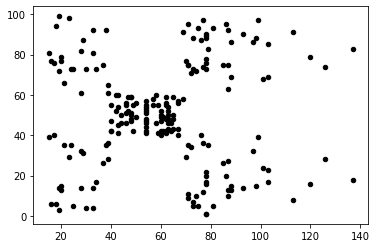

In [25]:
f1 = df['Annual Income (k$)'].values
f2 = df['Spending Score (1-100)'].values
x = np.array(list(zip(f1, f2)))

# Affichage du nuage de points
plt.scatter(f1, f2, c='black', s=20)
plt.show()

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans (n_clusters=3)
kmeans = kmeans.fit(x)
labels = kmeans.predict(x)
C = kmeans.cluster_centers_

print(C)

[[86.53846154 82.12820513]
 [87.         18.63157895]
 [44.15447154 49.82926829]]


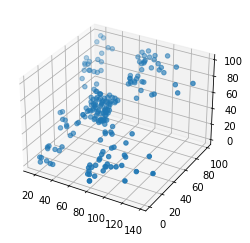

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 1])  # Assuming you want to use x[:, 2] for the z-axis
plt.show()

C:\Users\hp\AppData\Local\Temp/ipykernel_11436/983554071.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


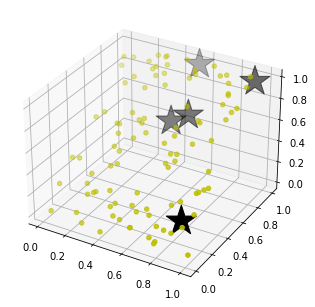

In [44]:
# Define placeholder data for X and C arrays
X = np.random.rand(100, 3)  # Assuming 100 data points with 3 coordinates each
C = np.random.rand(5, 3)  # Assuming 5 centroids with 3 coordinates each


fig = plt.figure()
ax = Axes3D(fig)
# Assuming X has three columns for x, y, and z coordinates
ax.scatter(X[:, 0], X[:, 1], X[:, 1], c='y')  
# Assuming C has three columns for x, y, and z coordinates
ax.scatter(C[:, 0], C[:, 1], C[:, 1], marker='*', color='black', s=1000)  

plt.show()

In [45]:
kmeans = KMeans (n_clusters=4)

kmeans = kmeans.fit(x)

labels = kmeans.predict(x)

C = kmeans.cluster_centers_

print(labels)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
